# Importando Bibliotecas

In [20]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import read, write
from record_module import *
from funcoes_LPF import *

# Constantes

In [21]:
fs = 44100
signal = signalMeu()
sd.default.samplerate = fs
sd.default.channels = 1

# Gravando Áudio

In [22]:
record_to_file('record.wav')

Gravação iniciada
Gravação finalizada


# Emissor

### Áudio Gravado

O som possui 132300 amostras e possui 3 segundos


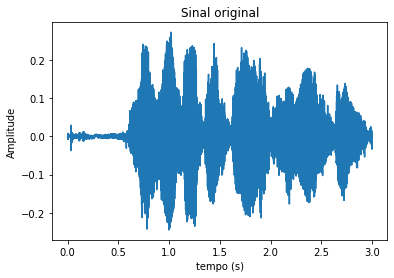

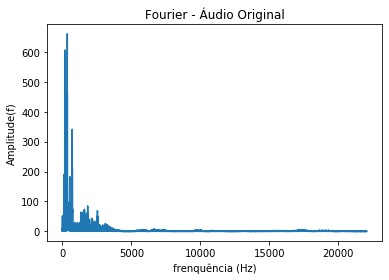

In [23]:
# Original
sound_array = np.array(read("record.wav")[1], dtype=float)
T = int(len(sound_array)/fs)
print(f"O som possui {len(sound_array)} amostras e possui {T} segundos")
signal.plotSignal(sound_array, T, fs, "Sinal original")
signal.plotFFT(sound_array, fs, "Fourier - Áudio Original")

### Normalizado

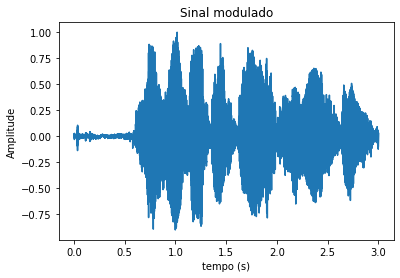

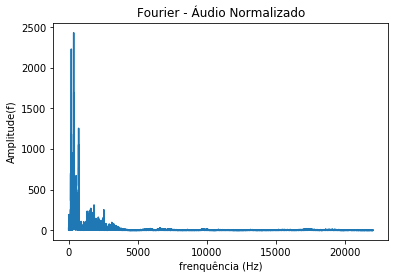

In [24]:
# Normalizado
maior_valor = np.max(np.abs(sound_array))
k = 1/maior_valor
normalizado = k*sound_array
sd.play(normalizado, fs) # -> ainda com o som audível
signal.plotSignal(normalizado, T, fs, "Sinal modulado")
signal.plotFFT(normalizado, fs, "Fourier - Áudio Normalizado")

### Filtrado

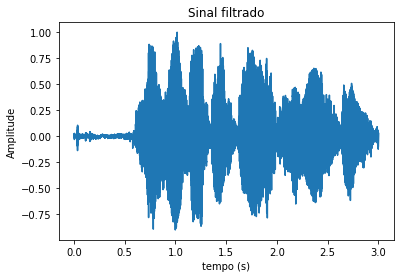

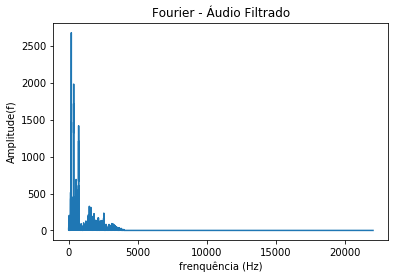

In [25]:
# Filtrado
filtrado = LPF(normalizado, 4000, fs)
signal.plotSignal(normalizado, T, fs, "Sinal filtrado")
signal.plotFFT(filtrado, fs, "Fourier - Áudio Filtrado")
sd.play(filtrado, fs)

### Modulado

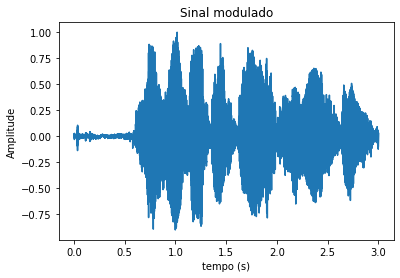

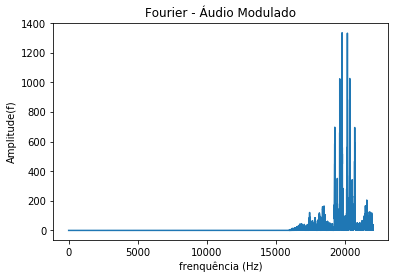

In [26]:
# Modulado
portadora = signal.generateSin(20000, 1, T, fs)[1]
modulado = portadora*filtrado
signal.plotSignal(normalizado, T, fs, "Sinal modulado")
signal.plotFFT(modulado, fs, "Fourier - Áudio Modulado")

# Receptor

### Sinal recebido

O som possui 176400 amostras e possui 4 segundos


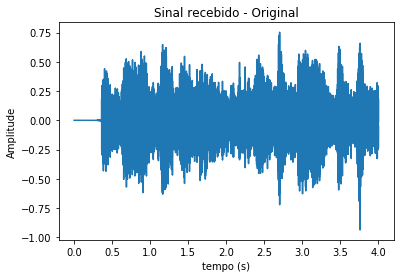

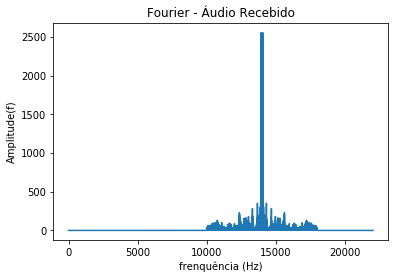

In [30]:
# Sinal Recebido
sound_recieved = np.array(read("modulated2.wav")[1], dtype=float)
T = int(len(sound_recieved)/fs)
print(f"O som possui {len(sound_recieved)} amostras e possui {T} segundos")
signal.plotSignal(sound_recieved, T, fs, "Sinal recebido - Original")
signal.plotFFT(sound_recieved, fs, "Fourier - Áudio Recebido")

### Desmodulado

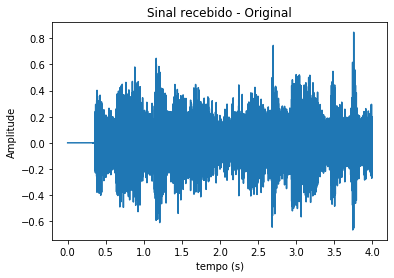

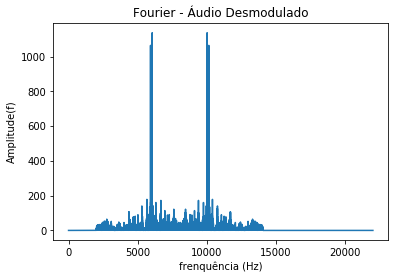

In [31]:
# Desmodulado
portadora = signal.generateSin(20000, 1, T, fs)[1]
demodulado = portadora*sound_recieved
signal.plotSignal(demodulado, T, fs, "Sinal recebido - Original")
signal.plotFFT(demodulado, fs, "Fourier - Áudio Desmodulado")

### Filtrado Recebido

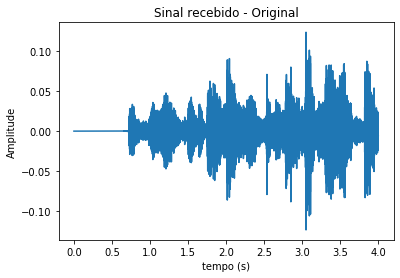

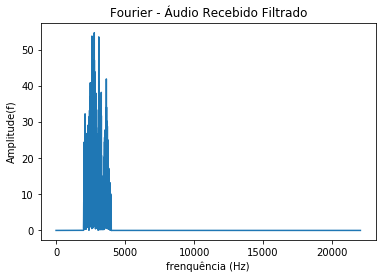

In [32]:
filtrado = LPF(demodulado, 4000, fs)
signal.plotSignal(filtrado, T, fs, "Sinal recebido - Original")
signal.plotFFT(filtrado, fs, "Fourier - Áudio Recebido Filtrado")
sd.play(filtrado)
sd.wait()